# **US Health Outcomes (Progress Report)**

**Group Leader:**\
*Ryyan Hussain* (rhuss4@uic.edu, [rhuss04](https://github.com/rhuss04))

**Group Members:**\
*Arjun Ancha* (aanch@uic.edu, [ArjunAncha](https://github.com/ArjunAncha))\
*Amit Bhatt*  (abhat32@uic.edu, [amitbhatt-star](https://github.com/amitbhatt-star))\
*Mateo Castillo* (mcast29@uic.edu, [CatMats](https://github.com/CatMats))\
*Joshua John* (jjohn314@uic.edu, [jjohn314](https://github.com/jjohn314))

## Introduction
This project investigates county-level health outcomes in the United States using the CDC’s PLACES dataset, which provides small and detailed estimates for public health indicators. 

The dataset contains over 2 million records, each representing a county, a specific health condition, and its associated prevalence rate, both crude and age-adjusted. This  project will focus on analyzing 4 major health outcomes: obesity, depression, binge drinking, and overall disability.

The central goal is to identify geographic patterns, correlations, and potential socioeconomic factors that influence the previously mentioned patterns. Understanding these complex relationships will expose regional inequalities and can inform future public policy decisions. 

## Changes?

After conducting our initial data preparation and exploratory data analysis (EDA), we have reviewed our original project scope and found that no changes are necessary at this time.

## Data
The dataset used in the project is the 2023 CDC PLACES release in CSV format. Data preparation, coded in Python, includes the following steps:

1. Loading the CSV file into Python using pandas.
2. Cleaning column names by stripping leading and trailing spaces.
3. Cleaning the Measure column by stripping spaces and converting text to lowercase for consistent filtering.
4. Filtering for targeted health measures: Obesity, Binge Drinking, Disability, and Depression.
5. Filtering by prevalence type, keeping only age-adjusted values and discarding crude values to ensure comparability across counties.
6. Pivoting the DataFrame so that each row represents a county and each column represents a measure’s prevalence value, resulting in a clean format ready for exploratory data analysis and visualization.


The filtered data contains 26530 rows, with each row representing a U.S location.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#The initial dataframe itself, unfiltered.
filePath = "PLACES__Local_Data_for_Better_Health__Place_Data_2023_release.csv"
df = pd.read_csv(filePath)

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (2054768, 21)
   Year StateAbbr  StateDesc LocationName DataSource         Category  \
0  2021        MO   Missouri    West Line      BRFSS  Health Outcomes   
1  2021        MO   Missouri  West Plains      BRFSS  Health Outcomes   
2  2021        MO   Missouri     Westwood      BRFSS  Health Outcomes   
3  2021        WI  Wisconsin     Florence      BRFSS       Prevention   
4  2021        MO   Missouri    Whiteside      BRFSS       Disability   

                                             Measure Data_Value_Unit  \
0  Chronic obstructive pulmonary disease among ad...               %   
1             Arthritis among adults aged >=18 years               %   
2             Arthritis among adults aged >=18 years               %   
3  Taking medicine for high blood pressure contro...               %   
4  Cognitive disability among adults ages >=18 years               %   

           Data_Value_Type  Data_Value  ... Data_Value_Footnote  \
0         Crude prevalence      

In [17]:
df.columns = df.columns.str.strip()

df["Measure"] = df["Measure"].str.strip().str.lower()

#assign targetMeasures to help with 
targetMeasures = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years",
    "any disability among adults aged >=18 years"
]

#the new dataframe, filtering only to have target measures to prevent fluff data.
dfFiltered = df[df["Measure"].isin(targetMeasures)]
dfFiltered = dfFiltered[dfFiltered["Data_Value_Type"] == "Age-adjusted prevalence"]

#new dataframe is pivoted into a wide format
dfWide = dfFiltered.pivot_table(
    index=["StateAbbr", "LocationName", "TotalPopulation"],
    columns="Measure",
    values="Data_Value"
).reset_index()

dfWide.columns.name = None

#filtered data is saved into a csv file
dfWide.to_csv('filtered_PLACESData_2023.csv', index=False)

#previewing the new data by it's head (first 5 rows)
print(dfWide.shape)
print(dfWide.head())
print(dfWide["StateAbbr"].unique())


(26530, 7)
  StateAbbr LocationName  TotalPopulation  \
0        AK     Akiachak              627   
1        AK        Akiak              346   
2        AK       Akutan             1027   
3        AK     Alakanuk              677   
4        AK    Aleknagik              219   

   any disability among adults aged >=18 years  \
0                                         50.5   
1                                         50.4   
2                                         28.5   
3                                         54.0   
4                                         41.4   

   binge drinking among adults aged >=18 years  \
0                                         15.8   
1                                         15.6   
2                                         15.1   
3                                         15.3   
4                                         18.6   

   depression among adults aged >=18 years  \
0                                     22.8   
1                       

## EDA 


Descriptive statistics show that obesity and any form of disability are more prevalent than binge drinking and depression, with average prevalence values of 36.1% and 29.8% compared to 17.9% and 23.5%, respectively. 
The standard deviations for obesity (5.6) and disability (6.8) are higher than those for depression (3.5) and binge drinking (2.8), indicating a wider spread of values. 

State-level bar charts reveal clear regional patterns. 
Southern states generally exhibit higher prevalence of obesity, depression, and disability, while binge drinking deviates from this pattern, being concentrated in the Midwest, with Wisconsin showing the highest rates. These patterns suggest geographic clustering of negative health outcomes.

Correlation analysis supports these observations. Obesity and disability are strongly positively correlated, indicating that these conditions often co-occur. 
Depression shows moderate positive correlation with obesity and disability, while binge drinking is negatively correlated with the other three measures, with the strongest negative correlation observed with disability. These findings highlight interesting relationships in the data and provide a foundation for further analysis.

Hypothesis 1: Binge drinking is negatively correlated with disability, obesity, and depression implying that causes of said medical condition may be influenced by different socioeconomic and health patterns that the other measures. 

Hypothesis 2: There is a significant inverse relationship between the prevalence of binge drinking and the prevalence of chronic negative health outcomes, specifically disability and obesity.

### State Prevalences


In [19]:
filePath = "filtered_PLACESData_2023.csv"

dfWide = pd.read_csv(filePath)

print("Select a health measure to sort states by (ascending):")


measureColumnsDictionary = {
    1: "obesity among adults aged >=18 years",
    2: "depression among adults aged >=18 years",
    3: "binge drinking among adults aged >=18 years",
    4: "any disability among adults aged >=18 years"
}


for key, val in measureColumnsDictionary.items():
    print(f"{key}: {val.title()}")


choice = int(input("\nEnter 1, 2, 3, or 4: ").strip())


selectedMeasure = measureColumnsDictionary[choice]


dfStateAverage = dfWide.groupby("StateAbbr")[selectedMeasure].mean().reset_index()


dfStateAverage = dfStateAverage.sort_values(selectedMeasure, ascending=False).reset_index(drop=True)


print(f"States sorted by ascending {selectedMeasure.title()}:")
print(dfStateAverage)


Select a health measure to sort states by (ascending):
1: Obesity Among Adults Aged >=18 Years
2: Depression Among Adults Aged >=18 Years
3: Binge Drinking Among Adults Aged >=18 Years
4: Any Disability Among Adults Aged >=18 Years



Enter 1, 2, 3, or 4:  1


States sorted by ascending Obesity Among Adults Aged >=18 Years:
   StateAbbr  obesity among adults aged >=18 years
0         MS                             42.653911
1         WV                             41.431043
2         OK                             41.251897
3         LA                             40.519486
4         AL                             40.514462
5         AR                             39.586847
6         OH                             39.307615
7         MO                             39.223593
8         SC                             39.102828
9         KY                             38.850760
10        ND                             38.765909
11        NE                             38.700825
12        KS                             38.631973
13        TX                             38.106106
14        GA                             37.804715
15        AK                             37.769869
16        IN                             37.553414
17        NC     

### Location Prevalence by State

Select a health measure:
1: Obesity Among Adults Aged >=18 Years
2: Depression Among Adults Aged >=18 Years
3: Binge Drinking Among Adults Aged >=18 Years
4: Any Disability Among Adults Aged >=18 Years


Enter 1, 2, 3, or 4:  1
Enter the 2-letter state abbreviation AK


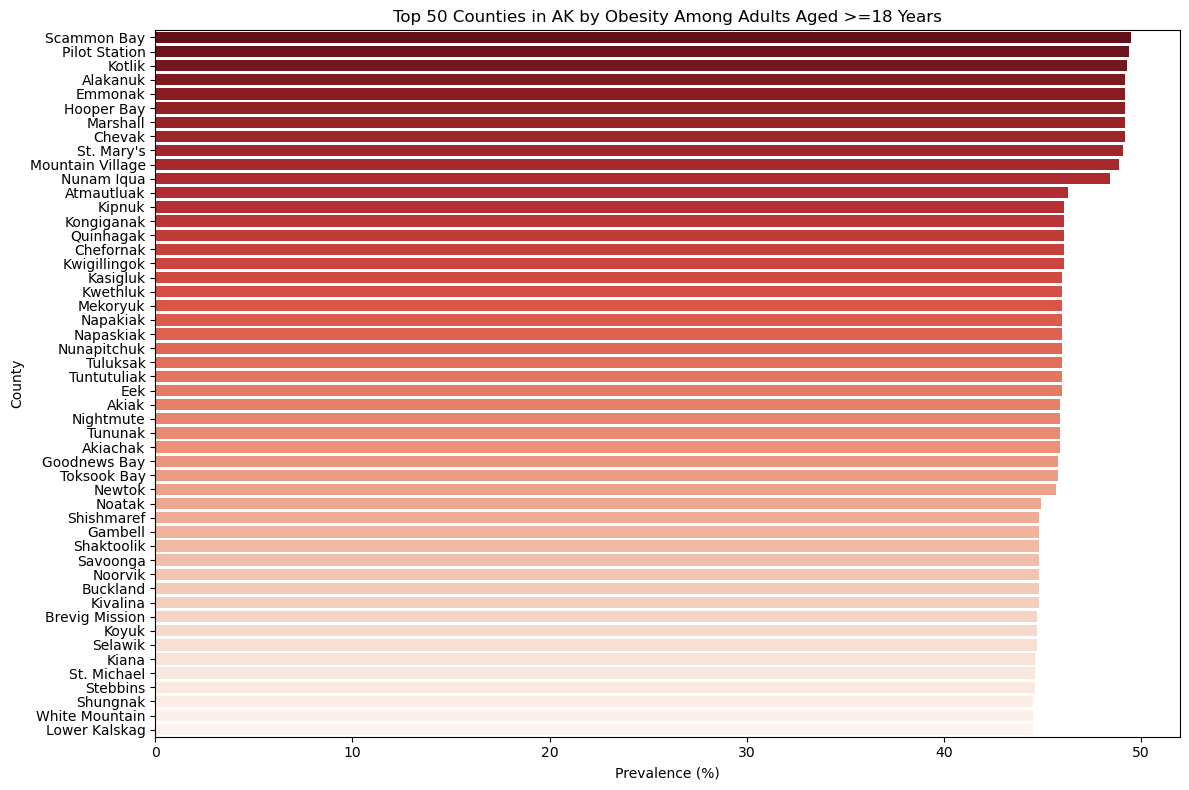

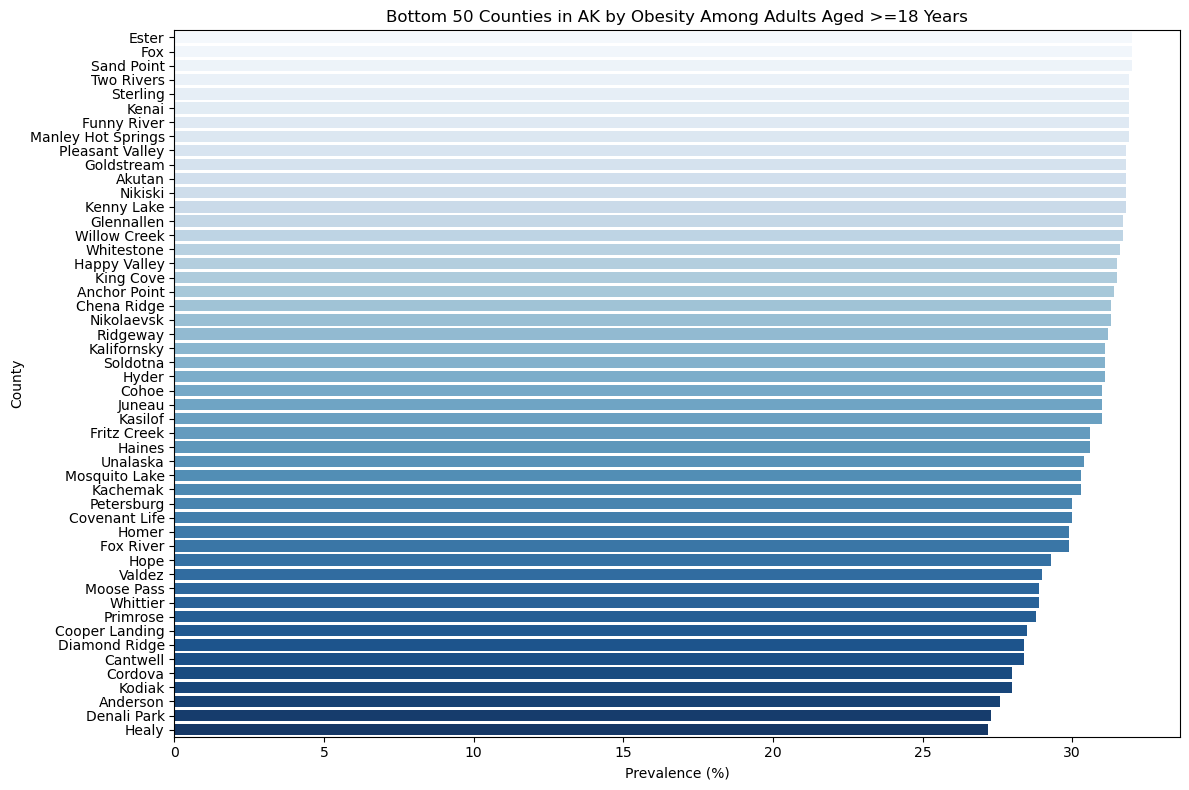

In [20]:
print("Select a health measure:")
for key, val in measureColumnsDictionary.items():
    print(f"{key}: {val.title()}")


choice2 = int(input("Enter 1, 2, 3, or 4: ").strip())
selectedMeasure2 = measureColumnsDictionary[choice2]


state = input("Enter the 2-letter state abbreviation").strip().upper()


dfState = dfWide[dfWide["StateAbbr"] == state]


dfState = dfState.sort_values(selectedMeasure2, ascending=False)


topLocations = dfState.head(50)


plt.figure(figsize=(12,8))
sns.barplot(x=selectedMeasure2, y="LocationName", hue="LocationName", data=topLocations, palette="Reds_r", legend=False)
plt.title(f"Top 50 Counties in {state} by {selectedMeasure2.title()}")
plt.xlabel("Prevalence (%)")
plt.ylabel("County")
plt.tight_layout()
plt.show()


bottomLocations = dfState.tail(50)


plt.figure(figsize=(12,8))
sns.barplot(x=selectedMeasure2, y="LocationName", hue="LocationName", data=bottomLocations, palette="Blues", legend=False)
plt.title(f"Bottom 50 Counties in {state} by {selectedMeasure2.title()}")
plt.xlabel("Prevalence (%)")
plt.ylabel("County")
plt.tight_layout()
plt.show()

### Correlation Matrix



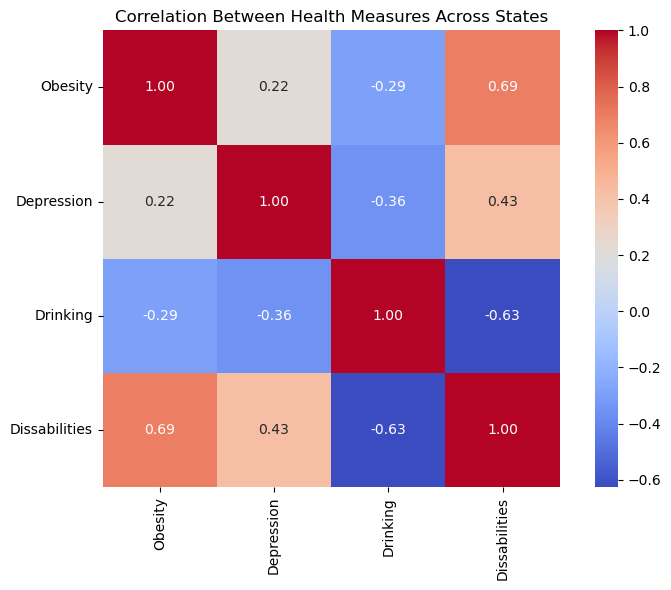

In [6]:
measureColumns = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years",
    "any disability among adults aged >=18 years"
]


dfState = dfWide.groupby("StateAbbr")[measureColumns].mean()


stateCorrelation = dfState.corr()


plt.figure(figsize=(8, 6))
ax = sns.heatmap(stateCorrelation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
ax.set(title="Correlation Between Health Measures Across States")

#Renaming existing ticks
newLabels = ["Obesity", "Depression", "Drinking", "Dissabilities"]
ax.set_xticks(np.arange(len(newLabels)) + 0.5)
ax.set_xticklabels(newLabels)
ax.set_yticks(np.arange(len(newLabels)) + 0.5)
ax.set_yticklabels(newLabels)

#tightening and showing the figure
plt.tight_layout()
plt.show()


### Violin Plot (Mateo Castillo)

This Violin plot is used to make a side-by-side comparison of the full shape and spread for the 4 health measures at a glance.

What it is showing is how widely distributed these health measures are accounted for accross all the US's counties.

We can see that 'Disability' and 'Obesity' by itself are taller, meaning there is a more broad range of outcomes across the country(i.e. the counties with the highest and lowest rates are very far apart).

Meanwhile, 'Depression' and 'Binge Drinking' are shorter, which means that the prevalence rates are more consistent and fall within a more specific range across the nation (i.e. most counties are very similar to each other on these measures).

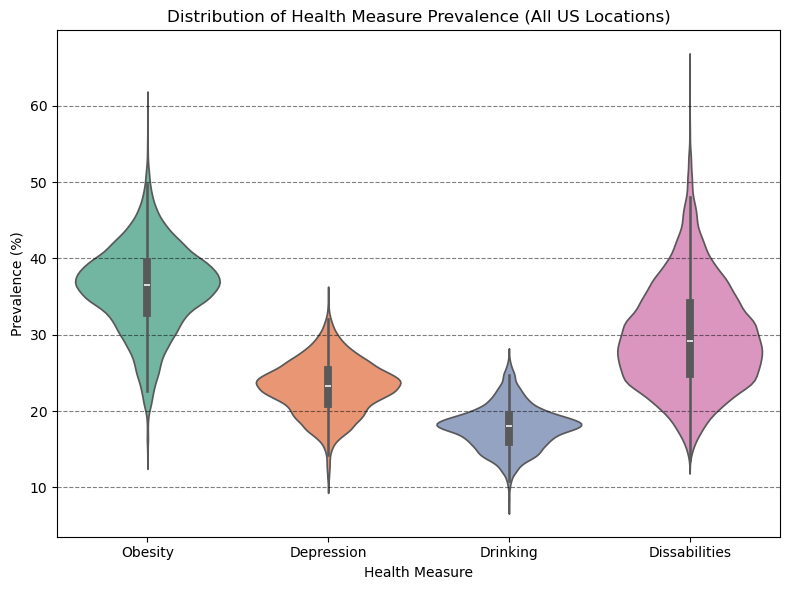

In [21]:
dfLong = dfWide.melt(id_vars=["StateAbbr", "LocationName"],
                     value_vars=measureColumns,
                     var_name="Measure",
                     value_name="Prevalence")

#creating the plot
plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=dfLong, x="Measure", y="Prevalence", hue="Measure", palette="Set2", legend=False)
ax.set(title='Distribution of Health Measure Prevalence (All US Locations)', xlabel='Health Measure', ylabel='Prevalence (%)')

#renaming existing ticks
newLabels = ["Obesity", "Depression", "Drinking", "Dissabilities"]
ax.set_xticks(range(len(newLabels)))
ax.set_xticklabels(newLabels)

#adding horizontal lines for easier visual comparison
ax.grid(True, axis='y', linestyle='--', color='black', alpha=0.5)

#tightening and showing the figure
plt.tight_layout()
plt.show()

## Machine learning

### Unsupervised Clustering (Arjun Ancha)

Would you like to analyze 'national' or 'state' data?  national


Cluster Summary for National
         binge drinking among adults aged >=18 years  \
Cluster                                                
0                                              14.83   
1                                              20.04   
2                                              18.05   

         obesity among adults aged >=18 years  \
Cluster                                         
0                                       41.98   
1                                       31.45   
2                                       36.17   

         depression among adults aged >=18 years  \
Cluster                                            
0                                          24.88   
1                                          20.15   
2                                          24.35   

         any disability among adults aged >=18 years  
Cluster                                               
0                                              38.69  
1                 

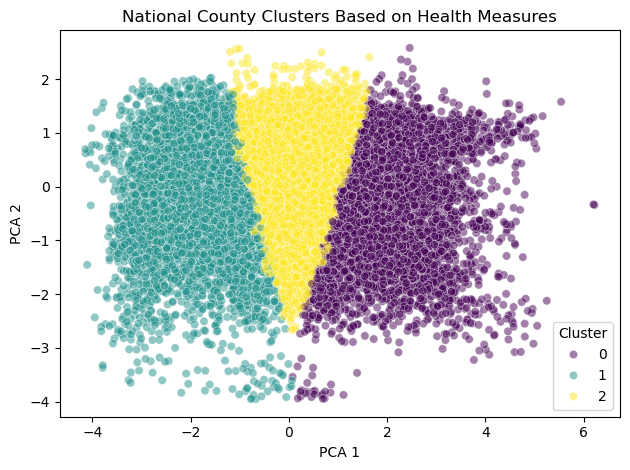

Mean Squared Error: 26.598417556613125
R² Score: 0.40955147281948634


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


choice = input("Would you like to analyze 'national' or 'state' data? ").strip().lower()


if choice == "state":
    stateAbbreviation = input("Enter the two-letter state abbreviation: ").strip().upper()
    dfSelected = dfWide[dfWide["StateAbbr"] == stateAbbreviation].copy()
elif choice == "national":
    stateAbbreviation = "National"
    dfSelected = dfWide.copy()
else:
    raise ValueError("Invalid input. Please type 'national' or 'state'.")


features = [
    "binge drinking among adults aged >=18 years",
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "any disability among adults aged >=18 years"
]


X = dfSelected[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dfSelected["Cluster"] = kmeans.fit_predict(X_scaled)


clusterSummary = dfSelected.groupby("Cluster")[features].mean().round(2)


print(f"Cluster Summary for {stateAbbreviation}")
print(clusterSummary)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
dfSelected["PCA1"] = pca_result[:, 0]
dfSelected["PCA2"] = pca_result[:, 1]


sns.scatterplot(
    data=dfSelected,
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="viridis",
    alpha=0.5
)
plt.title(f"{stateAbbreviation} County Clusters Based on Health Measures")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = dfSelected[["binge drinking among adults aged >=18 years"]]
y = dfSelected["any disability among adults aged >=18 years"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


### Supervised Learning (Mateo Castillo)

Model Performance (R-squared)
Baseline R² (Mean guessing): -0.000
Linear Regression R² (testing set): 0.756


Model Coefficients
                                             Coefficient
obesity among adults aged >=18 years            0.652073
depression among adults aged >=18 years         0.423668
binge drinking among adults aged >=18 years    -0.969866


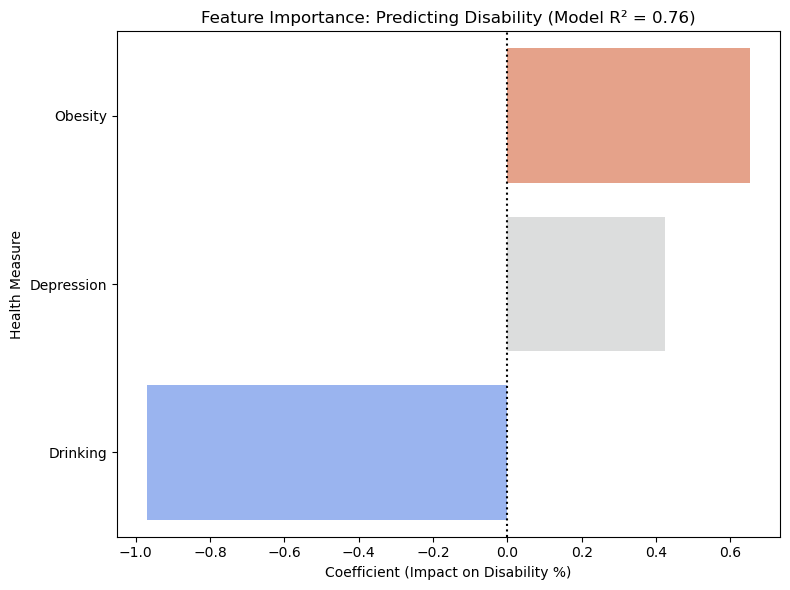

In [25]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score

#defining features and target
#we want to predict disability based on the other three measures.
#target (Y)
target = "any disability among adults aged >=18 years"
#features (X)
features = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years"
]

X = dfWide[features]
y = dfWide[target]

#splitting data into training ant testing sets (80% is training, 20% is testing)
#doing this tests the model on data it has never seen before.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#This model serves as a baseline. It just predicts average disability rate every time. 
#a valuable model should beat it.
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)
r2_baseline = r2_score(y_test, y_pred_dummy)

#this is a supervised ML model using Linear Regression
#it'll learn relationship between the features and the target.
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_model = model.predict(X_test)
r2_model = r2_score(y_test, y_pred_model)

#printing interpretation to console
print(f"Model Performance (R-squared)")
print(f"Baseline R² (Mean guessing): {r2_baseline:.3f}")
print(f"Linear Regression R² (testing set): {r2_model:.3f}")
print("\n")

#Creating coefficient dataframe for visualizing
#this holds the results of the model, showing the impact of each feature.
coeffs = pd.DataFrame(model.coef_, index=features, columns=["Coefficient"])
coeffs_plot = coeffs.reset_index().rename(columns={"index": "Health Measure"})

print("Model Coefficients")
print(coeffs)

#Creating the figure
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=coeffs_plot, y="Health Measure", x="Coefficient",hue="Health Measure", palette="coolwarm_r", legend=False)          
ax.set(title = f'Feature Importance: Predicting Disability (Model R² = {r2_model:.2f})',
       xlabel='Coefficient (Impact on Disability %)')

#renaming existing ticks
newLabels = ["Obesity", "Depression", "Drinking"]
ax.set_yticks(range(len(newLabels)))
ax.set_yticklabels(newLabels)

#adding vertical line at 0 for a clear baseline reference
ax.axvline(x=0, color='black', linestyle=':')

#tightening and showing the figure
plt.tight_layout()
plt.show()

## Reflection

Throughout this project, we worked with the CDC PLACES dataset to examine patterns in public health outcomes across the US. The process of cleaning, filtering, and restructuring the data established a strong foundation for subsequent exploration and analysis.  Using data visualizations, we identified clear regional trends, including a strong correlation between obesity and disability, as well as an inverse relationship between binge drinking and other negative health outcomes. These observations informed our preliminary machine learning models, which used predictive analysis to investigate our hypotheses and gather evidence. Integrating visualization with predictive analysis allowed us to validate patterns identified during the data exploration phase and gain a deeper understanding of the relationships among key health indicators nationwide.
